**Name**: Hood S. Mukiibi
<style>
    .tab {
        tab-size: 8;
    }
</style>
<a href="https://rudegentleman.github.io/">Website</a>   |
    <a href="https://www.linkedin.com/in/monsieurhud/">LinkedIn</a>   |
        <a href="mailto:hudmukiibi@gmail.com">Contact Me</a>   |
            <a href="https://github.com/rudegentleman">GitHub</a>   |
                <a href="https://rudegentleman.github.io/Hood_S_Mukiibi_Updated_CV.pdf">Resume</a>

**Date**: August 22, 2022


# Project: Investigate a Dataset - Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Welcome, to the Movie Data Analysis. For this project, I will be exploring different aspects of the movie data set availed in the project listings. I must say, I was a little conflicted in the initial stages as to what data set to analyze. I skimmed and quickly explored a number of data sets from various portals including the Kaggle, NIST, World bank among others and based on purely my love for movies, I decided to explore this particular data set which can be accessed <a href="https://viewe617827b.udacity-student-workspaces.com/tree/Database_TMDb_movie_data">here</a>.

The dataset was somewhat comprehensive in terms of the different features it had. When I further read about what goes into ensuring the success of a movie, I realized that perhaps some data points could have been captured or included in this dataset. In the dataset, the following columns were listed:

- id
- imdb_id
- popularity
- budget
- revenue
- original_title
- cast
- homepage
- director
- tagline
- Keywords
- Overview
- runtime
- genres
- production_companies
- release_date
- vote_count
- vote_average
- release_year
- budget_adj
- revenue_adj

It would be interesting to find out if any of these data points have a bearing on the success of the movie. The substratum of the success of a movie for this project will be defined by the revenue it generates vis-a-vis all the other elements namely `budget`,`cast`, `popularity`, `director`, `runtime`, and `production_companies`. We shall also explore if these variables have an influence on each other. The other aspect we want to explore if one variable has the sole influence on the success of a movie or whether it's a collection of features that determine the success of a movie. Overall, I feel we should be able to answer a few questions as listed below.

### Question(s) for Analysis
For this exercise, these are the questions we are going to explore from the data provided:

1. Does budget alone have a direct influence on the revenue and any other features?
   Here, we shall be exploring whether the budget has any bearing on the revenue generated from the movie. The anaylsis to be done will question whether having a big budget guarantees high revenue returns and vice versa. We shall also attempt to determine to what degree this influence is by examining the correlation between the two variables.
2. What other elements could be key to a movie generating more revenue?
   Based off the out findings from question one, we now want to explore what other features could have an influence on the revenue of a movie. We shall be examining the individual relationships between revenue and `cast`, `popularity`, `director`, `production_companies`. For the cast, we want to see if the top cast actors have been in the most successful movies or check which cast members have been in the most successful movies and compare with them the least cast members or least successful movies. In extension, we shall also check which directors have been involved in the most successful movies and what production companies they've worked with. All these factors will be compared to the revenue generated from the movies they've been involved in.

#### Upgrade pandas to use `dataframe.explode()` function. 

`!pip install --upgrade pandas`

The current installed version of pandas 0.25 did not have some packages I needed for some manipulations. The specific function needed was explode() which is a Python function used to transform or modify each member of an array or list into a row. This was specifically needed for those columns separated by the pipe (|) delimeter yet the elements needed to be analyzed individually. The specific columns include cast, production_companies and director for this exercise.


<a id='wrangling'></a>
## Data Wrangling
We begin our Data Wrangling process by importing the necessary packages we shall need. Thereafter, we load the data set.

In [1]:
# The imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_movie = pd.read_csv('tmdb-movies.csv')
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
df_movie.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
df_movie.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df_movie.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


Correlation of the different columns will give us an indication on where to focus. The correlation gives us an insight on which features to study and understand better but at the same time for those features with a negative correlation, we also get an understanding of why.


### Data Cleaning and Wrangling
 

#### Data Cleaning
1. Handle all missing data
2. Decide on the columns to use for this analysis

**Missing Data**

For this exercise, I decided to get rid of all missing values. As you will see in the cell to follow, I noticed the missing data was in columns that weren't of benefit for the analysis I wanted to make. Hence that informed my decision to get rid of the missing data. I don't think the missing data would have any significant effect on my analysis. These are the columns that had missing data
 - imdb_id
 - cast
 - homepage
 - director
 - tagline
 - keywords
 - overview
 - genres
 - production_companies

In [6]:
# Missing Data
df_movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# Dropping all nan values
df_movie.dropna(inplace=True)

In [8]:
# Confirmation of the changes effected
df_movie.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [9]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

**Dropping Columns**

In the same regard, after quickly looking at the dataframe `info()` outcome, I felt the following columns were of little significance to my analysis so I decided to get rid of them for this exercise.
 - tagline
 - keywords
 - overview
 - homepage

In [10]:
# Removing unwanted columns
df_movie.drop(columns=['tagline', 'keywords', 'overview', 'homepage'], inplace=True)

In [11]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   director              1992 non-null   object 
 8   runtime               1992 non-null   int64  
 9   genres                1992 non-null   object 
 10  production_companies  1992 non-null   object 
 11  release_date          1992 non-null   object 
 12  vote_count            1992 non-null   int64  
 13  vote_average          1992 non-null   float64
 14  release_year          1992 non-null   int64  
 15  budget_adj          

Now, with a preliminary data set to work with, I wanted to explore a couple of things about the data and possibly make some inferences from it. As an avid movie lover, I made some inferences from the general knowledge I have about movies or some of the things I personally look out for when deciding to watch a movie. Some of the aspects I consider include:
- The cast
- The Producers and/or Directors
- The genre of the movie
- The popularity of the movie (**PS**: I don't know if it's just me, but many times I've been disappointed with a number of popular movies)

With this data set however, I got another perspective in trying to understand what other features could influence the success of a movie. The success of a movie in this regard is a place-holder for popularity of the movie, budget and revenue and how all these elements correlate with each other. However, as earlier mentioned, the initial hypothesis is that a successful movie is one with the most revenue. Other aspects I looked at that weren't explicitly provided for in this data set but could be infered were the ratings and for this, I used the `vote_count` and `vote_average` columns from this data. I used the weighting average method to try and determine a rating for a movie and perhaps determine if that has any effect on the revenue generated from the movie. For the weighting average, I made reference from the following [website](https://www.geeksforgeeks.org/how-to-calculate-weighted-average-in-pandas/).

A quick look at the data, I realized some columns had multiple entries separated by a `pipe (|)`. Specifically, `cast`, `director`, `genres`, and `production_companies` as shown below.

In [12]:
# Extracting those columns whose data has a pipe as a separator
df_movie.iloc[:,np.r_[6,7,9,10]]

,cast,director,genres,production_companies
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...
...,...,...,...,...
10724,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,Peter R. Hunt,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq
10759,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,John Carpenter,Horror|Thriller,Compass International Pictures|Falcon Internat...
10760,John Belushi|Tim Matheson|John Vernon|Verna Bl...,John Landis,Comedy,Universal Pictures|Oregon Film Factory|Stage I...
10817,Robbie Robertson|Rick Danko|Levon Helm|Richard...,Martin Scorsese,Documentary|Music,FM Productions|Last Waltz Inc.


However, from this selection, I wanted to find out how many different genres of movies are listed just for my own information. However, at the same time, I wanted to find out from the data whether the `cast`, `director` or `production_companies` features had any bearing on the revenue as we shall see later. For now, let me find out how many different genres are in this listing.

In [13]:
# Extracting all values where df_movie.genres columns has a pipe
df_genre = df_movie[df_movie['genres'].str.contains('|')]
df_genre['genres'] = df_genre['genres'].apply(lambda x: x.split('|'))
df_genre.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
movie_genre = df_genre['genres'].explode().value_counts(ascending=False)

In [15]:
movie_genre = pd.DataFrame(movie_genre)
movie_genre

,genres
Drama,838
Comedy,640
Thriller,575
Action,532
Adventure,361
Science Fiction,291
Romance,291
Horror,273
Crime,262
Family,233


The process of getting the different genres in this listing involved upgrading pandas to be able to use the `explode()` function which works just like the `df.str.cat(sep='|')` function that we were showed during the office hours. From this, I call the `value_counts()` method to give me that exact count however, I chose to just create a dataframe from this just in case I might need it later on in the program.

From this, I now dig deeper into the data to begin answering my questions listed above. From the general movie data, I extract two dataframes df1 and df2 from df_movie as listed below:

- `df1` - is to contain an extract of all casts for each movie
- `df2` - is to contain an extract of all production companies.

The goal is to study whether the cast or production companies have an effect on the revenue generated from the movie. From this, we shall also look at other aspects to study whether any other elements like the budgets, popularity of the movie among others could also possibly have an effect on the revenue. We shall be using some inbuilt pandas functions like corr() which quickly help us determine which features we should consider in our analysis as we shall see in the cells to follow.

In [16]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   director              1992 non-null   object 
 8   runtime               1992 non-null   int64  
 9   genres                1992 non-null   object 
 10  production_companies  1992 non-null   object 
 11  release_date          1992 non-null   object 
 12  vote_count            1992 non-null   int64  
 13  vote_average          1992 non-null   float64
 14  release_year          1992 non-null   int64  
 15  budget_adj          

In [17]:
df_movie_cast = df_movie[df_movie['cast'].str.contains('|')].iloc[:,np.r_[0,2,3,4,5,6,7,8,9,10,11,12,13,14]]
df_movie_cast

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,668,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,Peter R. Hunt,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,12/12/69,258,6.4,1969
10759,948,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,John Carpenter,91,Horror|Thriller,Compass International Pictures|Falcon Internat...,10/25/78,522,7.3,1978
10760,8469,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,John Landis,109,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,7/27/78,230,6.7,1978
10817,13963,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,Martin Scorsese,117,Documentary|Music,FM Productions|Last Waltz Inc.,5/1/78,33,8.0,1978


In [18]:
df_movie_cast['cast'] = df_movie_cast['cast'].apply(lambda x: x.split('|'))
df_movie_cast.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [19]:
df1 = df_movie_cast.explode('cast')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9809 entries, 0 to 10819
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9809 non-null   int64  
 1   popularity            9809 non-null   float64
 2   budget                9809 non-null   int64  
 3   revenue               9809 non-null   int64  
 4   original_title        9809 non-null   object 
 5   cast                  9809 non-null   object 
 6   director              9809 non-null   object 
 7   runtime               9809 non-null   int64  
 8   genres                9809 non-null   object 
 9   production_companies  9809 non-null   object 
 10  release_date          9809 non-null   object 
 11  vote_count            9809 non-null   int64  
 12  vote_average          9809 non-null   float64
 13  release_year          9809 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


### NOTE
It was crucial for us to get the full list of all individual cast member for each movie so as to make an assessment of which actors have been cast the most. This way, we can get information on what movies they've been in and in extension, what production companies they've worked with. This would aid in our analysis to determine if these features could perhaps have an influence on the revenue the movie generated. This would go a long way in answering question two in this analysis.

In [20]:
df1.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


After creating `df1`, we shall now extract `df2`.

#### NOTE

In both scenarios, we are selecting specific columns to use during our analysis using `iloc` and `numpy`.

In [21]:
df_movie_prod = df_movie[df_movie['production_companies'].str.contains('|')].iloc[:,np.r_[0,2,3,4,5,6,7,8,9,10,11,12,13,14]]
df_movie_prod

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,668,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,Peter R. Hunt,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,12/12/69,258,6.4,1969
10759,948,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,John Carpenter,91,Horror|Thriller,Compass International Pictures|Falcon Internat...,10/25/78,522,7.3,1978
10760,8469,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,John Landis,109,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,7/27/78,230,6.7,1978
10817,13963,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,Martin Scorsese,117,Documentary|Music,FM Productions|Last Waltz Inc.,5/1/78,33,8.0,1978


In [22]:
df_movie_prod['production_companies'] = df_movie_prod['production_companies'].apply(lambda x: x.split('|'))
df_movie_prod.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,"[Village Roadshow Pictures, Kennedy Miller Pro...",5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,"[Summit Entertainment, Mandeville Films, Red W...",3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,"[Lucasfilm, Truenorth Productions, Bad Robot]",12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,"[Universal Pictures, Original Film, Media Righ...",4/1/15,2947,7.3,2015


In [23]:
df2 = df_movie_prod.explode('production_companies')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5675 entries, 0 to 10819
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5675 non-null   int64  
 1   popularity            5675 non-null   float64
 2   budget                5675 non-null   int64  
 3   revenue               5675 non-null   int64  
 4   original_title        5675 non-null   object 
 5   cast                  5675 non-null   object 
 6   director              5675 non-null   object 
 7   runtime               5675 non-null   int64  
 8   genres                5675 non-null   object 
 9   production_companies  5675 non-null   object 
 10  release_date          5675 non-null   object 
 11  vote_count            5675 non-null   int64  
 12  vote_average          5675 non-null   float64
 13  release_year          5675 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 665.0+ KB


### NOTE
After extracting the cast list, we now extract the individual production companies they worked with. The data from this dataframe will assist us in answering question Two in determining if working with certain production companies could have an influence on the revenue of a movie. In the analysis we shall do later, we shall consider the top 5 production companies and then look at the revenue from the movies they've worked with.

In [24]:
df2.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,6/9/15,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,6/9/15,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,6/9/15,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,6/9/15,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Dentsu,6/9/15,5562,6.5,2015


In [25]:
# Getting a listing of cast
df1['cast'].value_counts()

Matt Damon             23
Samuel L. Jackson      20
Mark Wahlberg          20
Ryan Reynolds          19
Jason Statham          17
                       ..
Aidan McArdle           1
Simon McBurney          1
Collin Chou             1
Nick Denton             1
Jan-Michael Vincent     1
Name: cast, Length: 4864, dtype: int64

In [26]:
# Getting a listing of the production companies
df2['production_companies'].value_counts()

Universal Pictures             134
Warner Bros.                   126
Columbia Pictures               85
Paramount Pictures              76
Relativity Media                70
                              ... 
Royal Oak Films                  1
Bee Holder Productions           1
Crest Animation Productions      1
Fedora Films                     1
Last Waltz Inc.                  1
Name: production_companies, Length: 2494, dtype: int64

I am getting the value counts for the cast and production companies because I'm making the assumption the information availed could have some elements of bias where more information was collected about certain actors or production companies which essentially overshadows the other respective entities in each field.

From here, all the time data will be converted to datetime format for easy assessment in the two dataframes as shown below. I know I could've changed this at the beginning but just wanted to keep track of all these changes.

In [27]:
# Changing release_date to datetime format.
df1['release_date'] = pd.to_datetime(df1.release_date, format='%m/%d/%y')
df2['release_date'] = pd.to_datetime(df2.release_date, format='%m/%d/%y')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Does budget alone have a direct influence on the revenue and any other features?

From the original dataframe df_movie, we run the correlation method from pandas to check which features we should focus on. We shall run this again just before we start our analysis.

Just based off the correlation, we can see there's reason to believe there's a strong relationship between the budget allocated for a movie and the revenue generated from it. This is also a true assumption from general knowledge however, to what degree will that be a factor in the revenue from a movie? The analysis follows...

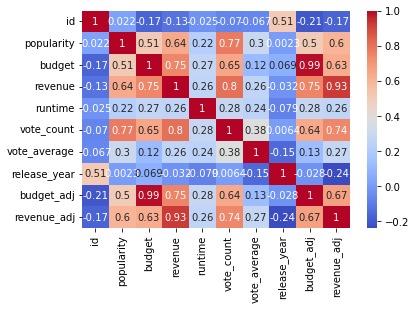

In [28]:
sns.heatmap(df_movie.corr(), annot=True, cmap='coolwarm');

Text(0.5, 1.0, 'History of Voting')

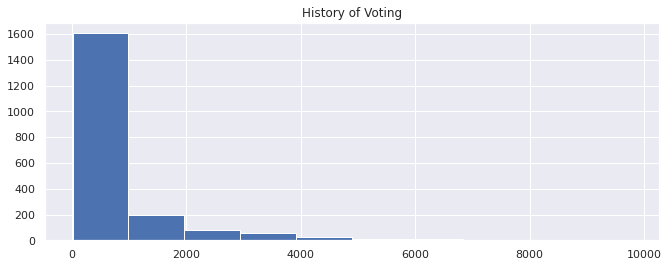

In [29]:
sns.set(rc={'figure.figsize':(11, 4)})
df_movie['vote_count'].hist()
plt.title('History of Voting')

Looking at the graph above, it is skewed to the right which could mean a number of things from the data not being normally or evenly distributed due to a number of factors. It could be that in the recent years, information on the vote counts is readily available as compared to the past.

Text(0.5, 1.0, 'Popularity of Movies Over the Years')

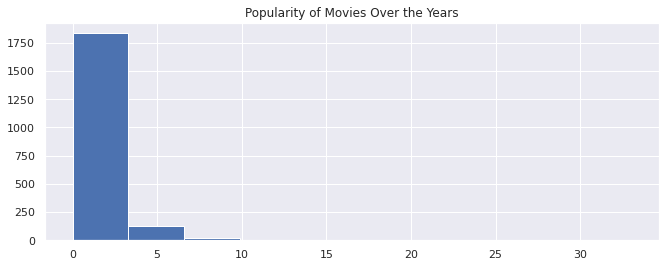

In [30]:
df_movie['popularity'].hist()
plt.title('Popularity of Movies Over the Years')

This is also synonymous with what we saw earlier.

Based off the correlation above, we want to explore how far the budget can go to influence revenue, popularity of the movie and run time. We shall later look at the revenue generated also in comparison with these elements.

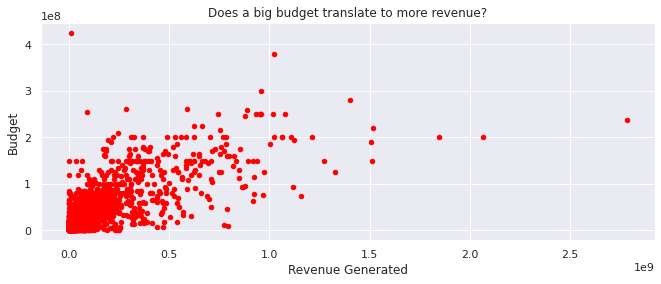

In [31]:
# Does a big budget translate to more revenue?
df_movie.plot.scatter(x = 'revenue', y = 'budget', c = 'red')
plt.title('Does a big budget translate to more revenue?')
plt.xlabel('Revenue Generated')
plt.ylabel('Budget')
plt.show();

From what we can see, a big budget doesn't necessarily mean more revenue. There are other factors that can influence the revenue of a movie besides the budget. From this analysis, there exists some outliers on both ends of the spectrum where a big budget has made more revenue returns and vice versa.

So while the budget doesn't necessarily guarantee big revenue, what other elements could be influenced by the budget. Do big budget movies have longer runtimes? We look at original budgets and the adjusted budget for this analysis. What was the budget for the movie with the longest runtime? What was the revenue of the longest (run time) movie? How does this compare to the movie with the biggest budget and biggest revenue?

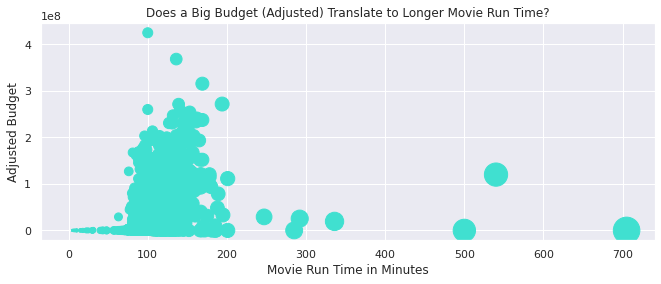

In [32]:
# Does the budget have any bearing on how long the movie will be?
df_movie.plot.scatter(x='runtime', y='budget_adj', s = 'runtime', c = 'turquoise')
plt.title('Does a Big Budget (Adjusted) Translate to Longer Movie Run Time?')
plt.xlabel('Movie Run Time in Minutes')
plt.ylabel('Adjusted Budget')
plt.show();

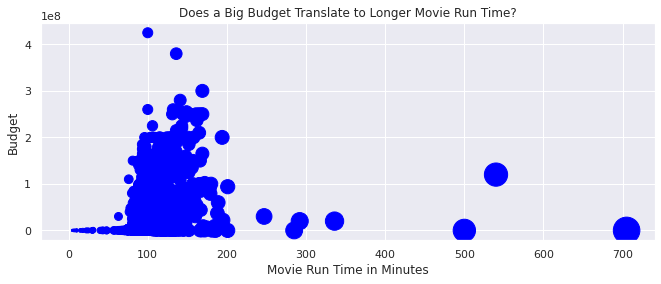

In [33]:
df_movie.plot.scatter(x='runtime', y='budget', s = 'runtime', c = 'blue')
plt.title('Does a Big Budget Translate to Longer Movie Run Time?')
plt.xlabel('Movie Run Time in Minutes')
plt.ylabel('Budget')
plt.show();

From the two figures above, a budget has no bearing on how long the movie will be. A big number of movies have an average of `106 minutes` with the longest movie being `Band of Brothers` on a budget of `0` as shown in the cells that follow.

In [34]:
df_movie.groupby('budget')['runtime'].describe()

,count,mean,std,min,25%,50%,75%,max
budget,,,,,,,,
0,546.0,96.844322,38.707934,0.0,87.0,95.0,102.75,705.0
1,2.0,95.000000,7.071068,90.0,92.5,95.0,97.50,100.0
3,1.0,87.000000,NaN,87.0,87.0,87.0,87.00,87.0
10,1.0,82.000000,NaN,82.0,82.0,82.0,82.00,82.0
30,1.0,134.000000,NaN,134.0,134.0,134.0,134.00,134.0
...,...,...,...,...,...,...,...,...
260000000,2.0,116.000000,22.627417,100.0,108.0,116.0,124.00,132.0
280000000,1.0,141.000000,NaN,141.0,141.0,141.0,141.00,141.0
300000000,1.0,169.000000,NaN,169.0,169.0,169.0,169.00,169.0


In [35]:
df_movie.query('runtime >= 705').iloc[:,np.r_[2,3,4,5,6,7,10]]

,popularity,budget,revenue,original_title,cast,director,production_companies
2722,0.537593,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,HBO


So the movie with the longest run time, has a zero rated buget. Could it be an issue of missing data or was this the right information? What can we say about the cast, director and the production company they worked with? These are all rhetorical questions.

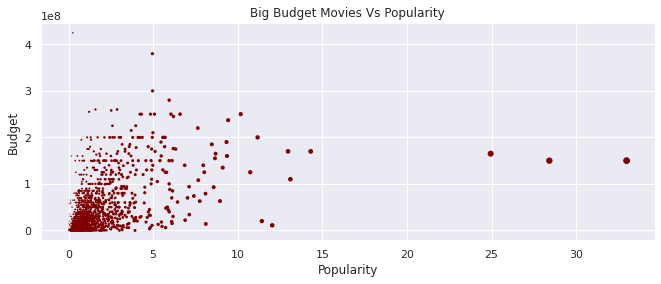

In [36]:
# What implications on the popularity of the movie will the budget have
df_movie.plot.scatter(y = 'budget', x = 'popularity', s = 'popularity', c='maroon')
plt.title('Big Budget Movies Vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Budget')
plt.show();

From the graph above, we see that the size of the budget alone doesn't necessarily have a direct impact on the popularity of the movie. We shall now explore things like popularity, cast as well as production companies and whether all these factors have an influence on the revenue of the movie.

### Research Question 2: What other elements could be key to a movie generating more revenue?

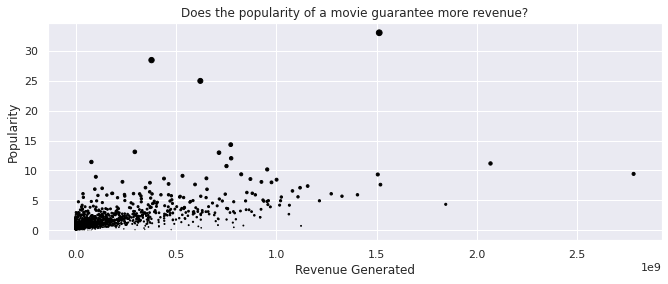

In [37]:
# Popularity of the movie as a reflection on the revenue
df_movie.plot.scatter(x = 'revenue', y = 'popularity', s = 'popularity', c = 'black')
plt.title('Does the popularity of a movie guarantee more revenue?')
plt.xlabel('Revenue Generated')
plt.ylabel('Popularity')
plt.show();

Yes, there appears to be a positive correlation on the popularity of the movie with the revenue generated. However, much as we have a score for popularity, what other aspects could be of influence to this popularity. Could it be the cast or the production company?

In [38]:
# Looking at actors who have been cast the most. Considering the top 5 most cast actors
df1['cast'].value_counts()

Matt Damon             23
Samuel L. Jackson      20
Mark Wahlberg          20
Ryan Reynolds          19
Jason Statham          17
                       ..
Aidan McArdle           1
Simon McBurney          1
Collin Chou             1
Nick Denton             1
Jan-Michael Vincent     1
Name: cast, Length: 4864, dtype: int64

In [39]:
# Method to print the popularity, budget, revenue, and runtime of the top and bottom 5 cast
def print_cast(cast_array):
    df1.query('cast in @cast_array').iloc[:,np.r_[1,2,3,7]].hist(figsize=(20,15));

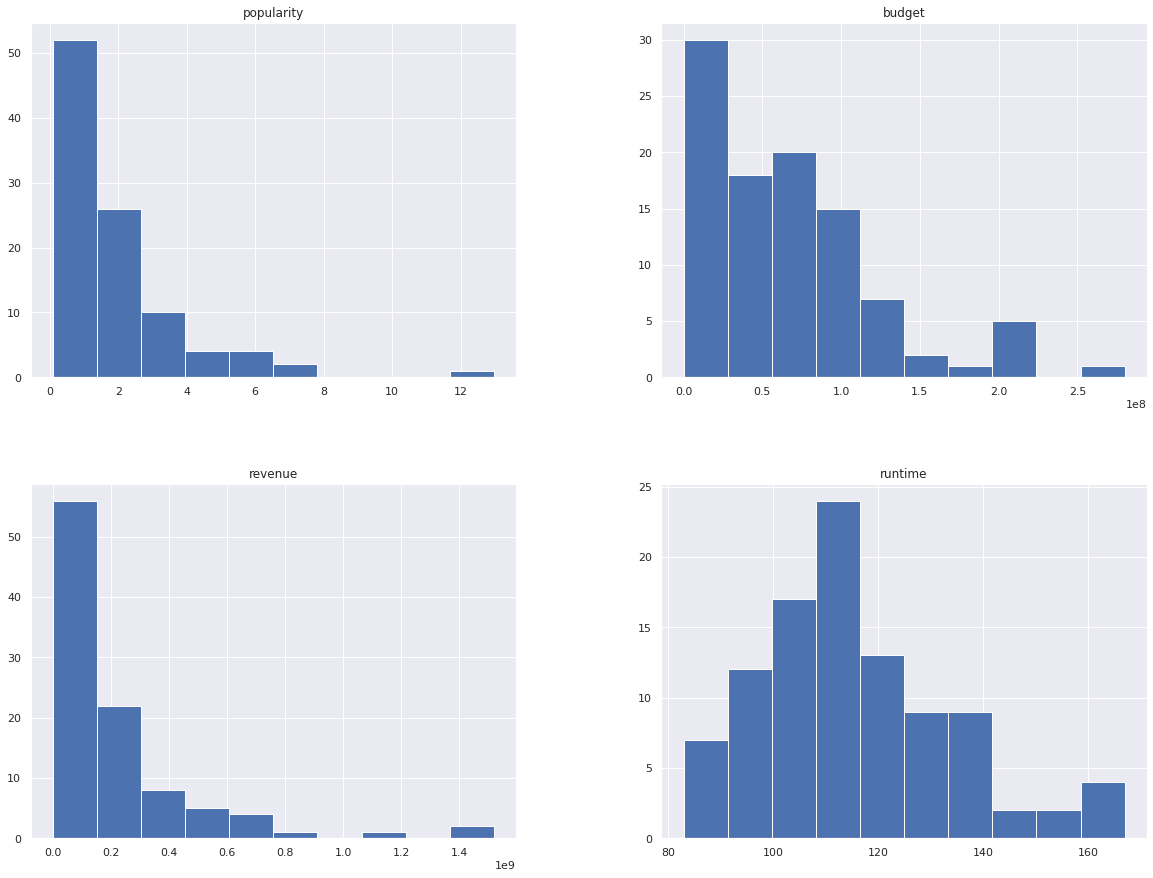

In [40]:
# Looking at how the top 5 most cast actors' movies have faired
top_5_cast = ["Matt Damon", "Samuel L. Jackson", "Mark Wahlberg", "Ryan Reynolds", "Robert Downey Jr."]
print_cast(top_5_cast)

From the figures above, we can see that the top 5 most cast actors have been in movies that are fairly popular and a few that aren't. From the budget standpoint, we can see that some have been in big budget movies while there are some who haven't and the same applies to the revenue from these movies. It should also be noted that majority of the movies these top 5 actors have been in have a runtime of just below `120` minutes with exception of a few outliers on both ends of the spectrum.

In the cell that follows, we list the movies they've been in as well as all the production companies these movies have been produced. In the proceedings that follow, we shall also check to see how the least cast actors fair as well, what movies they've been in, how those movies budgets and revenues have been as well as the popularity, run time and what production companies the movies were produced.

In [41]:
# Movies top 5 most cast actors have been in
def print_movies_top_cast(cast_array):
    movies_top_cast = df1.query('cast in @cast_array').original_title.unique() 
    return movies_top_cast
"""
This method returns a list of all movies the top 5 cast members have been in.
"""

'\nThis method returns a list of all movies the top 5 cast members have been in.\n'

In [42]:
# Printing movies for the top 5 cast
top_5_movies = print_movies_top_cast(top_5_cast)
top_5_movies

array(['The Martian', 'Avengers: Age of Ultron', 'The Hateful Eight',
       'Kingsman: The Secret Service', 'Self/less', "Daddy's Home",
       'Woman in Gold', 'Mississippi Grind',
       'Captain America: The Winter Soldier',
       'Transformers: Age of Extinction', 'The Judge',
       'The Monuments Men', 'Kite', 'Big Game', 'The Zero Theorem',
       'The Gambler', 'Sherlock Holmes', 'The Proposal',
       'The Lovely Bones', 'The Informant!', 'Invictus', 'Paper Man',
       'The Soloist', 'X-Men Origins: Wolverine',
       'Afro Samurai: Resurrection', 'Iron Man 2', 'True Grit',
       'Date Night', 'The Other Guys', 'Green Zone', 'Due Date',
       'The Fighter', 'Inside Job', 'Buried', 'Dogma',
       'The Talented Mr. Ripley', "Ocean's Eleven", 'Iron Man', 'Jumper',
       'Tropic Thunder', 'Definitely, Maybe', 'Max Payne', 'The Spirit',
       'The Happening', 'Chaos Theory', 'Charlie Bartlett',
       'Sherlock Holmes: A Game of Shadows', 'Green Lantern',
       'The Change

In [43]:
# Production houses the top 5 most cast actors have worked with
def print_prod_com(movies_array_cast):
    for mov in movies_array_cast:
        print(df2.query('original_title == @mov').production_companies)
"""
This method will print a list of all the production companies the top 5 movies worked with. 
The same method will be used to print the production companies for movies the 5 least cast members have worked with.
"""

'\nThis method will print a list of all the production companies the top 5 movies worked with. \nThe same method will be used to print the production companies for movies the 5 least cast members have worked with.\n'

In [44]:
print_prod_com(top_5_movies)

7    Twentieth Century Fox Film Corporation
7                    Scott Free Productions
7                        Mid Atlantic Films
7                     International Traders
7                         TSG Entertainment
Name: production_companies, dtype: object
14            Marvel Studios
14               Prime Focus
14    Revolution Sun Studios
Name: production_companies, dtype: object
15     Double Feature Films
15    The Weinstein Company
15               FilmColony
Name: production_companies, dtype: object
27    Twentieth Century Fox Film Corporation
27                                Marv Films
27                         TSG Entertainment
27                        Cloudy Productions
Name: production_companies, dtype: object
56      Endgame Entertainment
56    Ram Bergman Productions
Name: production_companies, dtype: object
91          Paramount Pictures
91    Gary Sanchez Productions
91               Good Universe
91        Red Granite Pictures
Name: production_companies, dtype: 

### Dealing with the least cast actors

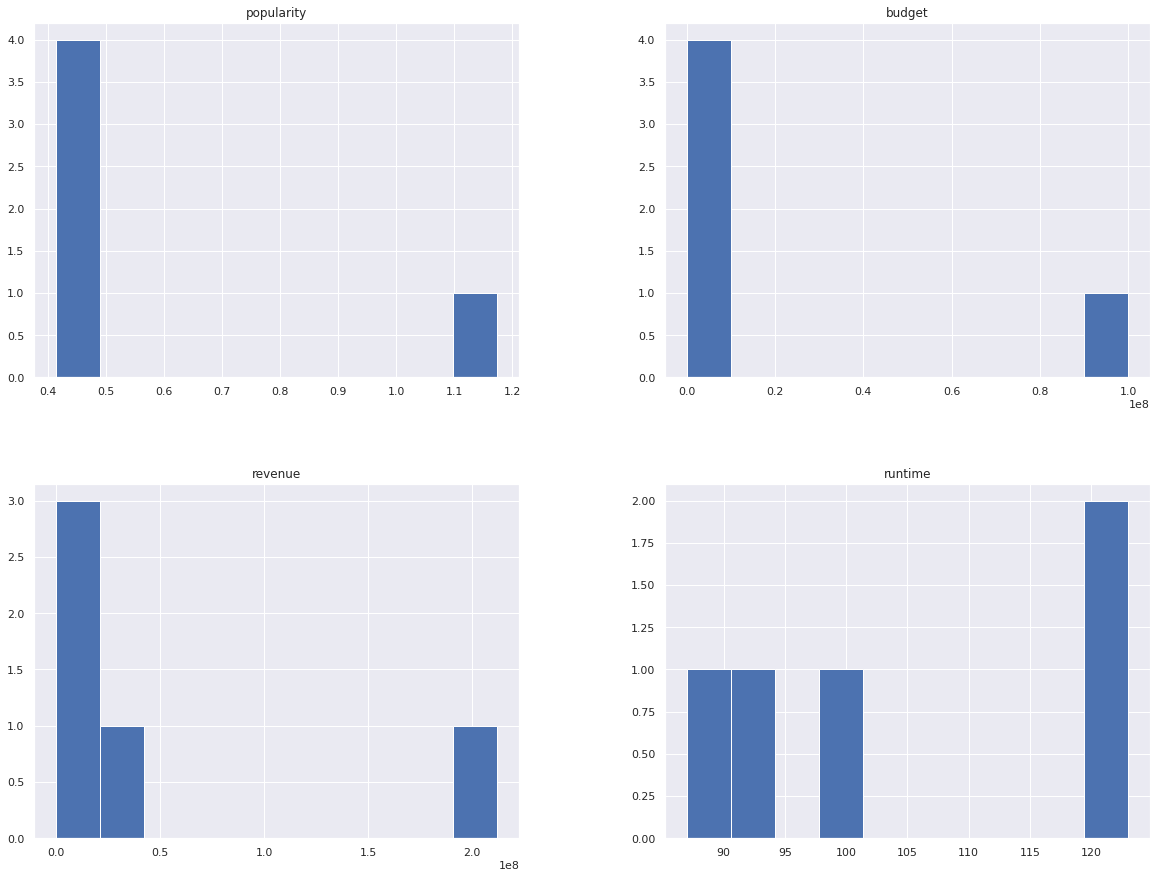

In [45]:
least_5_cast = ['Genevieve Buechner','Mike Erwin','Tom Brooke','Sergei Bezrukov','CCH Pounder']
print_cast(least_5_cast)

From the graphs above, the features associated with the least cast actors show that these actors have been cast in movies with sporadic popularity. The budget and revenue correlate for that particular instance however, there have been varying run times for each of the movies. In the cell to follow, we shall attempt to extract the movies these actors were listed.

In [46]:
# What movies have the least cast members been in?
least_cast_movies = print_movies_top_cast(least_5_cast)
least_cast_movies

array(['End of Days', 'Chaos Theory', 'ÐÐ´Ð¼Ð¸Ñ€Ð°Ð»ÑŠ', 'Judas Kiss',
       'The Veteran'], dtype=object)

In [47]:
# What production companies were movies the least cast members worked with?
print_prod_com(least_cast_movies)

2436    Beacon Communications
Name: production_companies, dtype: object
3060    Castle Rock Entertainment
Name: production_companies, dtype: object
3085    Film Direction
Name: production_companies, dtype: object
3620              TLA Releasing
3620    Blue Seraph Productions
Name: production_companies, dtype: object
3637         Local Films
3637    Premiere Picture
3637     DMK Productions
3637    Veteran Pictures
3637       Media Pro One
Name: production_companies, dtype: object


In [48]:
# Extracting quick information about revenue of all movies
df_movie.groupby('original_title').revenue.mean().describe()

count    1.980000e+03
mean     1.150999e+08
std      2.193182e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.610924e+07
75%      1.288197e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [49]:
# Extracting quick information about budget of all movies
df_movie.groupby('original_title').budget.mean().describe()

count    1.980000e+03
mean     3.453974e+07
std      5.052621e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.500000e+07
75%      4.800000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [50]:
# From the original data set, which movie has the highest revenue?
df1.query('revenue == 2781505847').original_title.unique()

array(['Avatar'], dtype=object)

In [51]:
# Who were the cast members from the most successful movie (based on revenue)?
df1.query('original_title == "Avatar"').cast

1386       Sam Worthington
1386           Zoe Saldana
1386      Sigourney Weaver
1386          Stephen Lang
1386    Michelle Rodriguez
Name: cast, dtype: object

In [52]:
# What production companies worked with the most successful movie (based on revenue)?
df2.query('original_title == "Avatar"').production_companies

1386                   Ingenious Film Partners
1386    Twentieth Century Fox Film Corporation
1386                        Dune Entertainment
1386                  Lightstorm Entertainment
Name: production_companies, dtype: object

In [53]:
# What's the popularity of the most successful movie (based on revenue)?
df_movie.query('original_title == "Avatar"').popularity

1386    9.432768
Name: popularity, dtype: float64

In [54]:
# What was the budget of the most successful movie (based on revenue)?
df_movie.query('original_title == "Avatar"').budget

1386    237000000
Name: budget, dtype: int64

### NOTE:
From this analysis we see that the movie `Avatar`, which has the highest revenue of over `USD 278m` isn't the most popular and it's actors aren't among the top cast actors.

In [55]:
# Now which movie had the highest budget?
highest_budget = df_movie['budget'].max()
df_movie.query('budget == @highest_budget').original_title

2244    The Warrior's Way
Name: original_title, dtype: object

In [56]:
# What was the revenue of the movie with the highest budget?
df_movie.query('original_title == "The Warrior\'s Way"').revenue

2244    11087569
Name: revenue, dtype: int64

In [57]:
# How popular was the movie with the highest budget?
df_movie.query('original_title == "The Warrior\'s Way"').popularity

2244    0.25054
Name: popularity, dtype: float64

In [58]:
# What production companies worked on the movie with the highest budget?
df2.query('original_title == "The Warrior\'s Way"').production_companies

2244    Boram Entertainment Inc.
Name: production_companies, dtype: object

In [59]:
# Who was cast in the movie with the highest budget?
df1.query('original_title == "The Warrior\'s Way"').cast

2244    Kate Bosworth
2244    Jang Dong-gun
2244    Geoffrey Rush
2244     Danny Huston
2244          Ti Lung
Name: cast, dtype: object

### NOTE:
As we can see, the movie (`The Warrior's Way`)with the highest budget of `USD 425m` only generated a revenue of `USD 11m` which represents approximately a `97%` loss. Looking at the cast, the actors aren't the most cast and the production company that worked on the movie isn't among the top companies.

<a id='conclusions'></a>
## Conclusions

As we conclude, we have explored different perspectives on what might determine the success of a movie in terms of its revenue. We started off by identifying the different data points we felt would be relevant for this study. We then explored the hypothesis that a big budget guarantees more revenue which we found was not the case. We went on to explore the relationship between the budget allocated for a movie and other attributes like the movie's popularity, the cast, the production companies. In this we wanted to see if a big budget means the movie had the best or top rated cast working with the best production companies. We also explored whether a big budget means the movie will have a longer run time.

We further made an analysis on how other features affected the success of the movie. Some of the things we looked out for included but not limited to the following:

1. Have the most cast actors been in the most successful movies?
2. What production companies have the most cast actors worked with?
3. What was the popularity of the movies they were in?
4. What was the budget allocated for these movies?

These questions were important for us to answer the second question where we wanted other elements could have a bearing on the success of a movie.

So while a good cast could influence the popularity of a movie and ultimately the revenue and budget for a movie, it is not a guarantee that this will translate to the highest revenue. A collection of features including the cast, budget, production companies, popularity will likely have an effect on the revenue generated by the movie. This study didn't take into account the votes cast about the movie. For this study, it was beyond our scope however further studies could be conducted to check if that has any bearing on the revenue. It would also be interesting to find out if the popularity of the cast members could have an impact on the success of the movie. This would take into perspectives of a fan base that watches a movie just because a certain actor is in it.

We can conclude that no single feature alone will influence the revenue. It's a collection of features that will have an impact on the revenue. As shown in the cells that follow, the movie with the highest revenue is **Avatar** however, it's not doing as well when it comes to its popularity. The production companies it worked with aren't even in the top 5 most production companies.

<a id='limitations'></a>
### Limitations

One of the limitations I faced during this exercise was to do with how I handled missing data. I don't think dropping the missing data was the best alternative perhaps I could have handled that better. However, the columns with missing data were mainly qualitative so it was data that could not be counted, measured or easily expressed in numbers. Below is the extract for the columns that had missing data

`imdb_id                   10`

`cast                      76`

`homepage                7930`

`director                  44`

`tagline                 2824`

`keywords                1493`

`overview                   4`

`genres                    23`

`production_companies    1030`

### Data Storage
**NOTE**

In order to aid reproducing this analysis from a clean dataset, a copy of the sanitized dataset has been stored into an SQLite database.

In [60]:
from sqlalchemy import create_engine

In [61]:
# Creating the DB engine
engine = create_engine('sqlite:///hence_movies.db')

In [62]:
# Storing the dataframe into master table
df_movie.to_sql('master', engine, index=False)

1992

## THE END